(ch:modulesutiles)=
# Modules utiles 

Mis à jour : {sub-ref}`today`, lecture : {sub-ref}`wordcount-minutes`
minutes minimum, PhL.

**`random`, `matplotlib` et `time`**  pour des expériences de complexité, entre autres.

Petites expériences qui nous permettent de découvrir des modules bien utiles :   
- d'introduire **de l'aléatoire** avec `random` 
    - pour générer des données de test, de débug, ...
- d'apprendre à **faire des graphiques** avec `matplotlib`  
- d'utiliser des fonctions de modules importés du module `time` pour **mesurer des temps d'exécution**,  
    - et ainsi apprécier la validité et les limites de la notion de complexité algorithmique, 


## De l'aléa avec le module `random`

Commençons par ce module déjà utilisé au semestre 1.  

Les expérimentations demandent souvent _mais pas systématiquement_ de générer des données aléatoires.  
Le module `random` permet ça, ou presque car la génération __déterministe__ de valeurs a priori quelconques est un processus __pseudo-aléatoire__ .  

### Principe d'un générateur **pseudo**-aléatoire

- une graine : $u_0$  
- une récurrence déterministe : $u_n = f(u_{n-1})$ où $f$ définit de l'_aléa_.

### Fonctions utiles
Après un :

In [1]:
import random

- `random.seed()` : graine du générateur
    - fixer la graine permet la _reproductibilité_ de la génération pseudo-aléatoire

**Lois discrètes (entières)** 
- `random.randint(a, b)` : uniforme _discrète_ sur [a, b] <-- remarquer l'intervalle fermé !  
- `random.randrange(a, b, pas)` : uniforme _discrète_ sur [a, a+pas, a+2*pas, ..., b[ (intervalle ouvert à droite) 

**Lois continues**    
- `random.random()`  : uniforme sur [0,1]
- `random.uniform(a, b)` :  uniforme sur [a,b]
- `random.gauss(moyenne, ecart_type)` : Normal($\mu$, $\sigma$)

In [2]:
#help(random)

n = 10
t0 = [0 for i in range(n)]
t1 = [0 for i in range(n)]
t2 = [0 for i in range(n)]
t3 = [0 for i in range(n)]

# graine arbitrairement choisie par le système 
random.seed()
for i in range(10):
    t0[i] = random.random()

for i in range(10):
    t1[i] = random.random()

# on bloque la graine
random.seed(12345)
for i in range(10):
    t2[i] = random.random()

# on reprend la même graine 
random.seed(12345)
for i in range(10):
    t3[i] = random.random()

print(t0 == t1)
print(t1 == t2)
print(t2 == t3)
print(t1)
print(t2)

False
False
True
[0.2304410650794254, 0.27001519524734185, 0.6847292755824804, 0.7588615063939051, 0.8545931688386355, 0.5701392313083615, 0.5534168737153746, 0.15884266062993413, 0.22202056374764323, 0.9510383105884794]
[0.41661987254534116, 0.010169169457068361, 0.8252065092537432, 0.2986398551995928, 0.3684116894884757, 0.19366134904507426, 0.5660081687288613, 0.1616878239293682, 0.12426688428353017, 0.4329362680099159]


## Tracer avec `matplotlib`

C'est utile ... et pas moche ! 

###  `matplotlib` : qu'est ce que ça fait ? 

Le module python `matplotlib` est un module adapté à tous les types de tracés
scientifiques : courbes, histogrammes, nuages de points, $\dots$ 
On verra même qu'il permet d'afficher des images, ds photos, ...  

* Ses options sont très nombreuses, de même que la documentation en
ligne ou "livrée avec".
`matplotlib` est composé de nombreux sous-modules. 
Parmi ceux-ci, celui qui nous intéresse est `pyplot`.  
L'instruction suivante est très très classique.

In [3]:
import matplotlib.pyplot as plt

* L'utilisation basique de `pyplot` consiste : 
    * à tracer des courbes $x-y$ 
    * à partir de listes de points, d'un fichier de valeurs ou d'une expression,   
    * de choisir les bons axes, les bonnes échelles,  
    * d'indiquer les noms des courbes et des axes, 
    * de visualiser les tracés à l'écran 
    * et de les sauvegarder dans des fichiers (pdf ou png).   

* En pratique, chaque action _modifie l'état de la figure_ en cours d'élaboration.   
Une action est un appel de fonction `plt`.   
Il peut être utile de tracer plusieurs "sous-figures" au sein d'une
même figure. 

Le module python `numpy` est le compagnon naturel de `matplotlib`.   

In [4]:
import numpy as np

### `matplotlib` : comment ça le fait ?

Une première prise en main grâce à :
- ces synthèses très  bien faites pour niveaux [débutant](https://matplotlib.org/cheatsheets/_images/handout-beginner.png) ou [intermédiaire](https://matplotlib.org/cheatsheets/_images/handout-intermediate.png) et [des compléments](https://matplotlib.org/cheatsheets/_images/handout-tips.png)
- ces 2 feuilles de résumé de commandes : [résumé 1](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png), [résumé 2](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png)

De façon plus guidée :
- [cette présentation](http://www.labri.fr/perso/nrougier/teaching/matplotlib/) en français
- [celle ci](https://realpython.com/python-matplotlib-guide/), en anglais et extraite du site de qualité [realpython.com](https://realpython.com)
- les "tutoriaux" de `matplotlib` en anglais mais par niveau : [débutant](https://matplotlib.org/stable/tutorials/index.html), [intermédiaire](https://matplotlib.org/stable/tutorials/index.html#intermediate) ou [avancé](https://matplotlib.org/stable/tutorials/index.html#advanced)
- ou enfin le chapitre 3 du [_user guide_](https://matplotlib.org/contents.html) (qui comporte plus de 2500 pages). 
    

**Vocabulaire et notions de base**

Le schéma suivant illustre les principales notions de base d'un tracé `pyplot`.

![](fig/vocab_pyplot.png)

- `figure` est un regroupement d'un ou plusieurs `axes` **avec `es`** (_ie._ un container python d'objets `axes`)
    - plusieurs `axes` sont stockés comme un tableau d'`axes` sous la forme d'un `ndarray` `numpy` (et donc avec un indiçage différent des `list`2D python)    
- un `axes` **avec `es`**  (le pluriel de _axis_) représente un tracé (d'une ou plusieurs courbes, diagrammes en bâtons, ...). Il est donc composé d'`axis` (avec `is`) : les "axes des x, des y", d'échelles, de légendes, titres ... 
    - ne pas confondre `axes` et `axis`
    - `axes` est l'objet central : pour obtenir un tracé, on va manipuler un `axes` par des appels de fonctions-méthodes spécifiques
    - chaque appel modifie l'état de l'`axes` : définir  des `axis`, leur échelle, tracer les courbes, ajouter un titre, ... on procède par couches successives
        - le cas échéant on changera d'`axes` pour effectuer d'autres manipulations
    - et on affichera l'état final de la  `figure`   

Ces notions sont hiérarchiques :  
`figure` > `axes` > (`xaxis`, `yaxis`, `title`, `xlabel`, ...) > `xticks`, 
 

On va montrer quelques commandes de base :  
* crée une `figure` et le/les `axes` (un par défaut) qui la compose : `subplots()`
* afficher de courbes : __`plot`__, `title`, `legend` ;
* gérer les `axis` : `xticks`, `xlim`, `loglog`, `semilogx` ; 
* gérer les affichages : `show`, `savefig`, `close`.

### Exercice  

Obtenir le tracé des principales classes de complexités : $log_2n$, $n$, $n\ \log_2(n)$, $n^2$, $n^3$, $2^n$ 
pour les premières puissances de 2 -- par exemple de 2 à 128.   

A votre avis, pourquoi des échelles logarithmiques sont adaptées ?  

**Rmq.** 
- La solution intègre en commentaires quelques commandes utiles au traitement hors des notebook, cad. dans un programme python écrit sous l'idle par exemple.  
- ligne 45 : elle suppose l'existence d'un répertoire `./tmp` (à adapter si besoin)  

:::{tip}

Obtenir une figure pertinente est un _vrai travail_ qui s'effectue en plusieurs itérations. 
Il est conseillé de "jouer" avec les différentes commandes jusqu'à obtenir le support graphique qui correspond au message que l'on veut faire passer, celui-ci devant être adapté au public visé.

:::

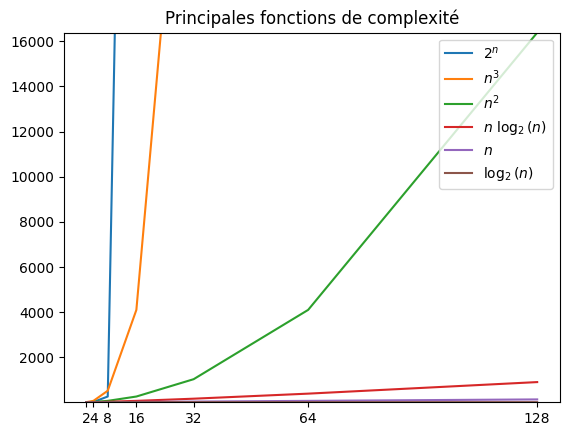

In [5]:
# complexites.py
"""Trace des principales classes de complexites avec matplotlib"""

# la figure et ces zones de tracé : ici une seule (ax)
fig, ax = plt.subplots()

# son titre
ax.set_title("Principales fonctions de complexité")

# valeurs d'évaluations
n = [2**i for i in range(1,8)]  # les premieres puissances de 2  

# tracés des évaluations
ax.plot(n, np.power(2.0, n), label="$2^n$")
ax.plot(n, np.power(n, 3), label="$n^3$")
ax.plot(n, np.power(n, 2), label="$n^2$")
ax.plot(n, n*np.log2(n), label="$n\ \log_2(n)$")
ax.plot(n, n, label="$n$")
ax.plot(n, np.log2(n), label="$\log_2(n)$")

# ses axes en log2 : pour bien voir
#ax.set_xscale("log", base=2)
#ax.set_yscale("log", base=2)

# valeurs affichees sur l axe des x
label_x = [str(val) for val in n]
ax.set_xticks(n, label_x)

# valeurs affichees sur l axe des y
#y_val = [np.power(2, j) for j in range(0, 15, 2)]
#label_y = [str(val) for val in y_val]
#ax.set_yticks(y_val, label_y)

# on limite les valeurs de y trop grandes
ax.set_ylim(1.0, np.power(2,14))
#

# afficher la légende à cette position
ax.legend(loc="upper right")

# sortie ecran (inutile sous notebook)
#fig.show()

In [6]:
#ou fichier pdf : suppose l'existence d'un repertoire ./tmp
from matplotlib.backends.backend_pdf import PdfPages 

fig = plt.figure(figsize=(10,8), dpi = 80)  # size est en pouce...
pp = PdfPages('./tmp/plt-complexites.pdf')
pp.savefig()
pp.close()

<Figure size 800x640 with 0 Axes>

### Manipuler des images avec `matplotlib`

Il est classique de définir des images à niveaux de gris par un tableau 2D d'entiers compris en 0 (noir) et 255 (blanc) -- voir par exemple la [Feuille 3](td:td3).

Voyons comment afficher de telles images avec `matplotlib`.

Si ce n'est pas encore fait, on importe `matplotlib.pyplot`

In [7]:
import matplotlib.pyplot as plt

On définit 4 images basiques à l'aide de tableaux python.

In [8]:
l = 3
c = 4

t0 = [[0 for i in range(c)] for j in range(l)] # un tableau de 0
t127 = [[127 for i in range(c)] for j in range(l)] # un tableau de 127
t255 = [[255 for i in range(c)] for j in range(l)] # # un tableau de 255

# un degradé de valeurs de 0 à 255
unit = int(255/(l*c)) 
t = [[ (i + j*c) * unit for i in range(c)] for j in range(l)] 

print(t)

[[0, 21, 42, 63], [84, 105, 126, 147], [168, 189, 210, 231]]


Avec la fonction-méthode `.matshow()`, on affiche les images correspondants aux tableaux définis plus haut.  
On note les paramètres effectifs qui définissent comment interpréter les valeurs du tableau :

- `cmap` (_color map_) ici une échelle de gris définie à partir de :
- `vmin` jusqu'à
- `vmax`.


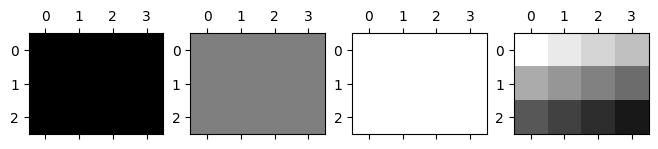

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 4))

ax1.matshow(t0, cmap="gray", vmin=0, vmax=255)
ax2.matshow(t127, cmap="gray", vmin=0, vmax=255)
ax3.matshow(t255, cmap="gray", vmin=0, vmax=255)
ax4.matshow(t, cmap="gray_r", vmin=0, vmax=255)

#for ax in (ax1, ax2, ax3, ax4):
#    ax.tick_params(axis='both', which='both', **nolabels)


On va nettoyer cet affichage à l'aide du dictionnaire `nolabels` et de 

On supprime les indications d'axes adaptées aux courbes mais inutiles ici.
La modification est sauvegardée dans un dictionnaire (`nolabels`) qui sera utilisé avant l'affichage.
Oui ! En l'état de vos connaissances, ce traitement peut vous paraître un peu chimique ...

In [10]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


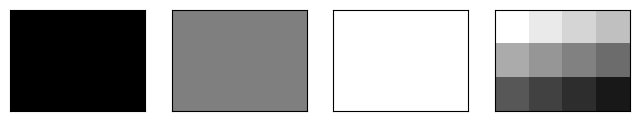

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 4))

ax1.matshow(t0, cmap="gray", vmin=0, vmax=255)
ax2.matshow(t127, cmap="gray", vmin=0, vmax=255)
ax3.matshow(t255, cmap="gray", vmin=0, vmax=255)
ax4.matshow(t, cmap="gray_r", vmin=0, vmax=255)

for ax in (ax1, ax2, ax3, ax4):
    ax.tick_params(axis='both', which='both', **nolabels)

Voilà exactement ce qu'on souhaitait !

**Exercice.**

- Regardez ce que donne la `cmap="gray_r"` ? 

### A vous maintenant !

#### Le flocon de Von Koch

 Le flocon de Von Koch (1906) est une courbe fractale
(continue partout et dérivable nulle part) obtenue comme la limite
de la transformation suivante appliquée récursivement à un segment
de départ.
* le segment est découpée en 3 parties égales,
* le segment intermédiaire est remplacé par deux segments formant un triangle équilatéral avec le segment supprimé, 
* et ainsi de suite sur les 4 segments ainsi obtenus.  

Voici les cinq premières courbes obtenues à partir d'un segment droit
ou d'un triangle équilatéral : le flocon de Von Koch.  
On parle aussi de courbe de Von Koch d'ordre $n$ pour la courbe de la
$n$-ième récursion -- les tracés suivants correspondent aux segments
de Von Koch d'ordres $0, \cdots, 4$. 

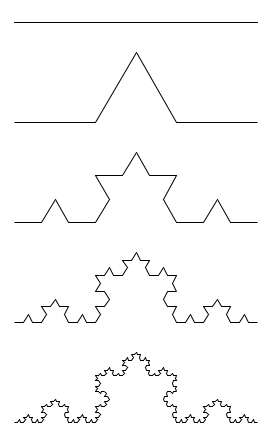

In [12]:
from IPython.display import Image 
Image(filename='./fig/cinqsegmentsvk.jpg')

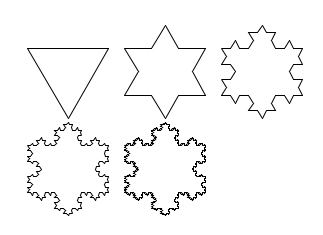

In [13]:
Image(filename='./fig/cinqflocons.jpg')

**Traçons-le !**

On va se limiter à celui avec un segment de départ.  
Avec `matplotlib`, on choisit de calculer les coordonnées des sommets des
transformés successifs du segment de départ, puis de les tracer comme
une courbe. 

1. Écrire la fonction `segvk()` qui à partir  des
  extrémités d'un segment  $[a, b]$, par exemple définies par ses
  affixes complexes,  calcule et retourne la liste  (des affixes)
  des points significatifs d'une itération de Von Koch de $[a, b]$.

2.  Écrire la fonction `listevk()` qui applique une itération de Von
  Koch  à une liste de segments.

3. Apliquer ces fonctions pour obtenir le tracé `matplotlib` des
  premières itérations du segment $[-1, 1]$.   
  
  Il est agréable d'obtenir ces tracés sous la forme de sous-figures comme présenté ci-dessus.  
  

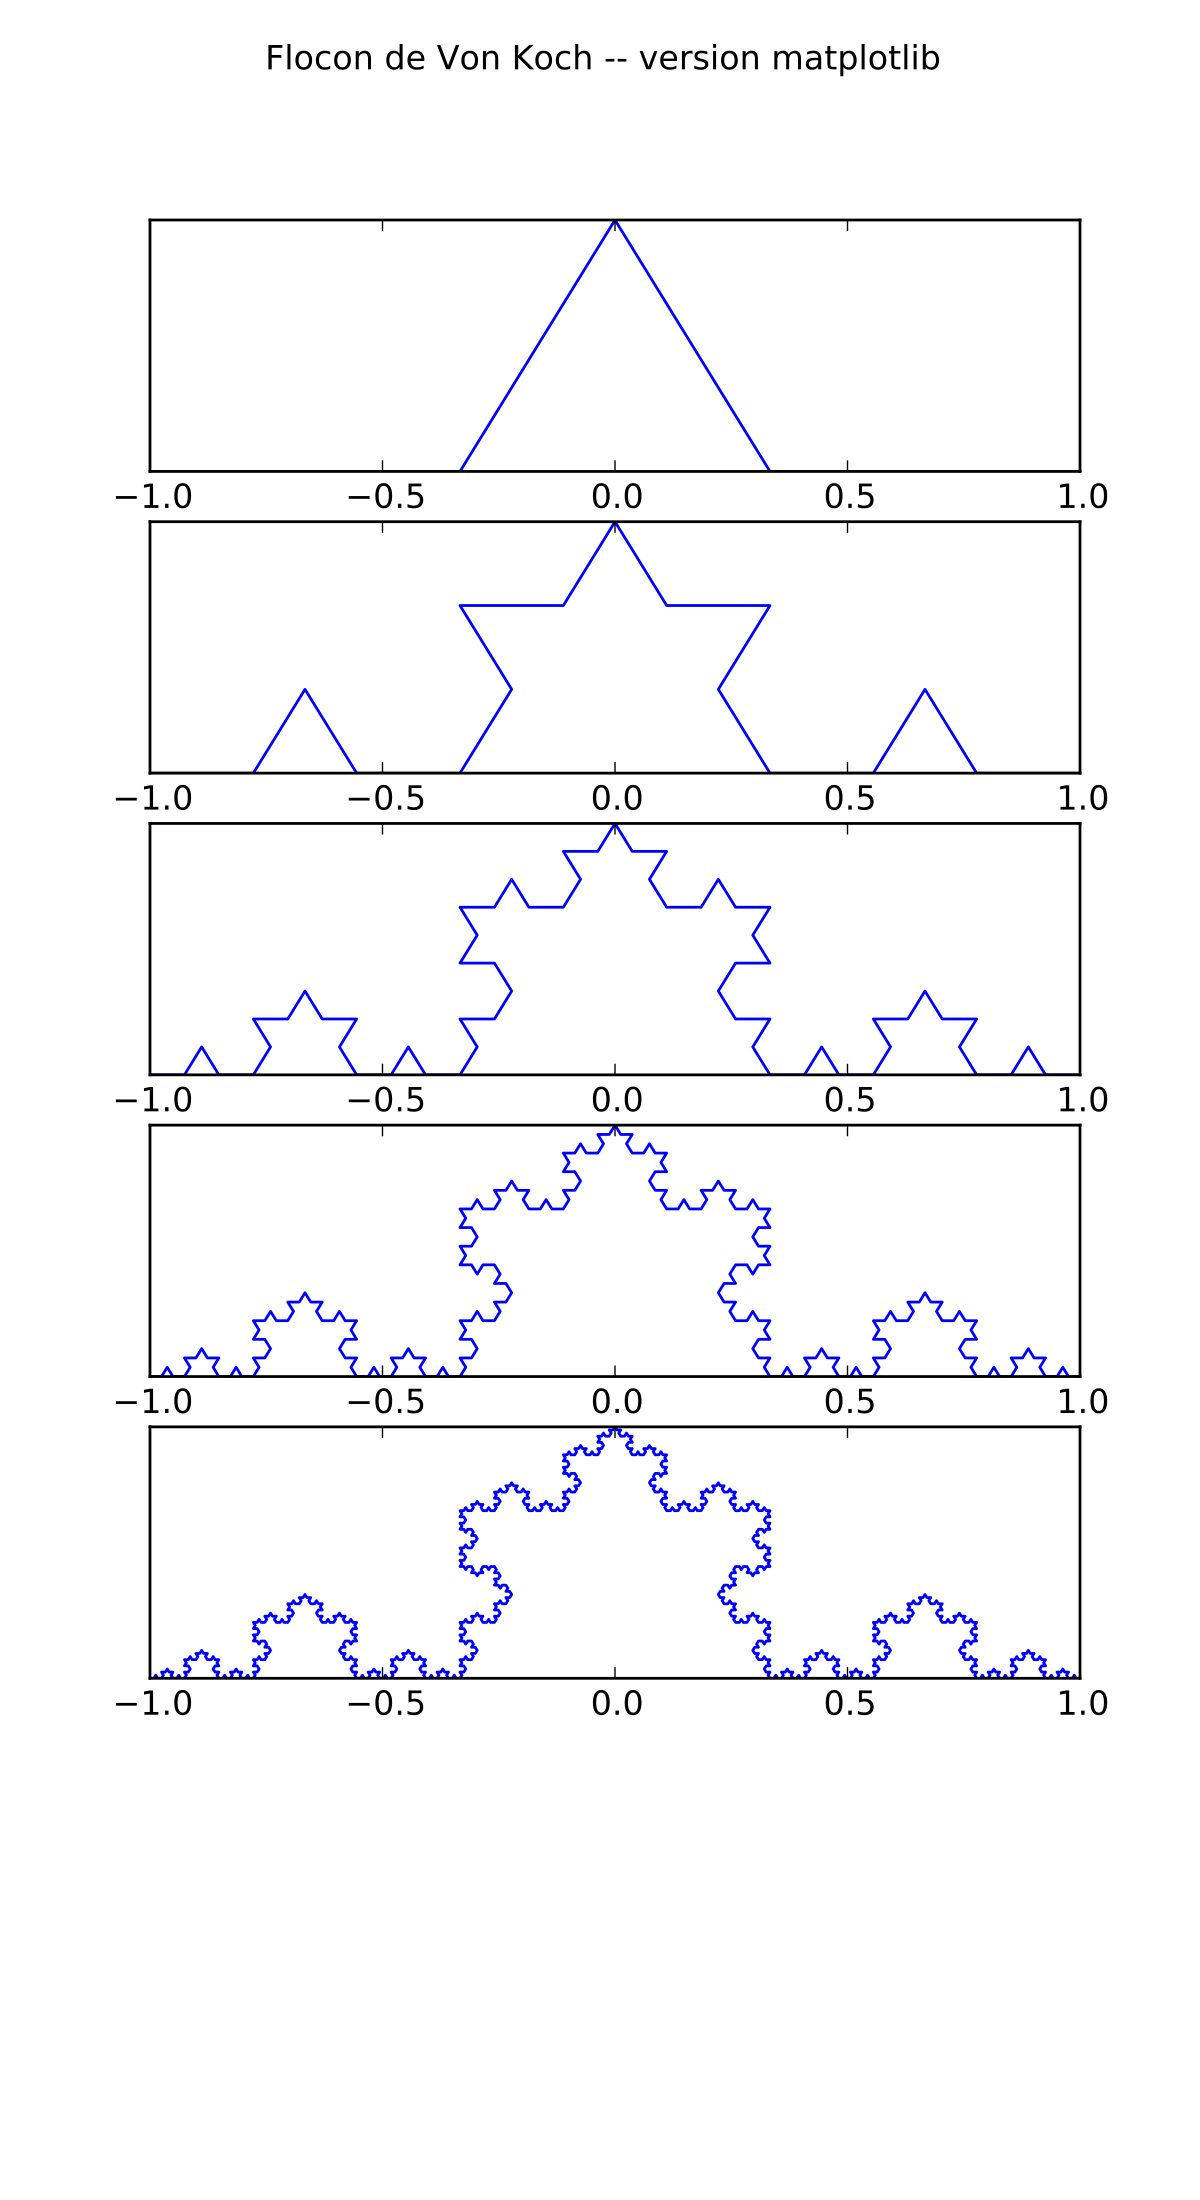

In [14]:
Image(filename='./fig/plt-segvk.png', width=520 )

## ($\star$) Mesurer le temps d'exécution d'un programme 

### Pas si simple ...

Mesurer le temps d'exécution d'un programme sur une machine actuelle
est une une tâche beaucoup plus ardue qu'il n'y parait.
En effet, l'impression que l'__exécution__ de votre programme
__mobilise à elle seule les ressources__ de votre ordinateur est une
__illusion__.

Le __temps__ que vous attendez pour obtenir votre résultat, même si cela
vous parait instantané, est en fait __partagé__ : pendant ce même temps,
votre ordinateur  effectue certainement de nombreuses autres tâches,
par exemple liées au système d'exploitation, aux périphériques, à
d'autres utilisateurs si votre machine gère plusieurs sessions, ...  

Par ailleurs, les unités de calculs et l'organisation (des niveaux) de
la mémoire compliquent très fortement la mesure fiable des temps
d'exécution et leur analyse.

En pratique, __plus ce que vous voulez mesurer est court, plus la mesure
sera incertaine et non reproductible__.  

Pour ce qui nous intéresse,
l'obtention d'une mesure significative consistera à :
1.  répéter l'exécution dans une boucle, 
1.  mesurer le temps d'excution de __cette boucle__ et
1.  en retenir la moyenne. 
Il n'est pas inutile de répéter ce type de mesures et le cas échéant
de traiter l'échantillon obtenu.

Les "gros problèmes" sont aussi sujets à remarque.  
* Des tailles de données importantes nécessitent un volume important de
transferts entre la mémoire et les unités de calcul. 
* Ces transferts mémoire sont complexes ;
* leurs temps est :
    * d'une part non linéaire par rapport à la taille des données, 
    * et d'autre part beaucoup plus important que les temps de calcul souvent associés. 
      
A titre indicatif, il y a __un facteur 10 entre ce temps de transfert
et le temps d'un calcul arithmétique élémentaire__.  
- ce qui veut dire qu'il faut 10 fois plus de temps pour lire deux valeurs en mémoire que pour faire leur addition, par exemple.  

Ainsi, les mesures peuvent être surprenantes lorsqu'elles deviennent
"dominées" par ces temps de transfert.    
Le modèle de nos analyses de la complexité des algorithmes ne prend
pas en compte cet aspect vite technique. 

Pour finir, ceci illustre la différence entre les propriétés d'un
algorithme et celles de ses mises en oeuvre et, par la même occasion,
confirme l'intérêt des notations asymptotiques $\cal{O}$, $\theta$,
  $\Omega$ dont on a souvent signalé qu'elle masquent pas mal de
détails. 
  

### Mesurer avec le module `time`

Ce module python fournit beaucoup de fonctions en rapport avec le temps :
gestions de calendriers, des systèmes horaires, d'horloges ...  

Il permet aussi une estimation des temps d'exécution des programmes
python (et autres). 
La qualité de cette estimation dépend des mises en oeuvre de ce
module et des machines visées.
Vous pouvez __être relativement confiant sur vos PC-linux ou mac__.

* La fonction  `time()` est annoncée avec une précision de la
seconde, sans que ce soit garanti pour toutes les machines.   
_Une seconde : c'est beaucoup !_ C'est en effet suffisamment long pour
effectuer 2 giga = 2 $\cdot 10^9$ opérations ...   
`time()`  peut donc être utile pour des __mesures grossières__ ou des 
exécutions __de très gros volumes__.

* La fonction `perf_counter()` est définie depuis python3.3.  
Lorsqu'elle est disponible, elle permet les mesures les plus fines
possibles adaptées à la mesure des temps d'exécution de programmes
(sans être pour autant exacte, ni reproductible).    
Elle utilise des fonctions spécifiques aux architectures des machines
qui exploitent les __compteurs matériels__.  

Ces fonctions sont __très simples à utiliser__  
On procède en deux appels qui encadrent la portion de code à mesurer.  

* `t0 = time.perf_counter()`: le premier appel initialise une valeur initiale
`t0`;  

* `t = time.perf_counter()`: le second appel  mesure `t` à l'issue de
  l'exécution de la portion de code  
  
* __`t - t0`__ est la mesure de ce temps d'exécution (moyennant les
réserves précédentes).  

Ne pas oublier de _boucler autour_ de la portion à analyser et de _mesurer à l'extérieur_ de cette boucle.  

### Un _benchmark_ en  $\theta(n)$ : la somme itérative

`sommer()` : l'algorithme classique par accumulation itérative.

In [15]:
def sommer(t, dim_t):
    '''somme itérative de n valeurs entières stockées dans un tableau
    entrées. t : tab d'int de longueur n
    retourne. res : int
    '''
    res = 0
    for i in range(dim_t):
        res = res + t[i]
    return res

# les 10 premiers entiers
tab10 = [i for i in range(1, 10)]

# somme itérative
s1 = sommer(tab10, len(tab10))

# somme des n premiers entiers
n = len(tab10)
s2 = n * (n+1) //2

print(s1, ' = ', s2)

45  =  45


### Un premier exemple

où on compare `time.time()` et `time.perf_counter()` 

In [16]:
# pour afficher les sorties matplotlib dans le notebook
%matplotlib inline

In [17]:
import time
from random import *

# formats affichage : fx.format(val)
fint = "{:0=8}" #entier sur 7 digits complete avec 0 a gauche
fexp = "{:7.3e}"#float en notation e sur 7 digits dont 3 apres le .
ffl = "{:5.1f}" #float sur 5 digits dont au plus 1 apres le .

# timings operations en O(n) 
dim = 10000
dimmax = dim

# 1. avec des listes python
a = [random() for i in range(dimmax)]
b = [random() for i in range(dimmax)]

In [18]:
# nb repetititions de chaque mesure
nbrepet = 20

# time : timings operations en O(n) 
# les mesures sont à l'intérieur de la répétition
# car on veut évaluer la sensibilité de ces bestiolles

t_time = [] # les mesures
for repet in range(nbrepet): 
    # la mesure
    t0 = time.time()
    r = sommer(a, dimmax)
    t = time.time()
    #
    t_time.append(t-t0)

# perf_counter
t_tsc = [] # les mesures
for repet in range(nbrepet):
    # la mesure
    t0 = time.perf_counter()
    r = sommer(a, dimmax)
    t = time.perf_counter()
    #
    t_tsc.append(t-t0)

In [19]:
# aff mesures    
for r in range(nbrepet):
    print(fexp.format(t_time[r]) , fexp.format(t_tsc[r]))

7.360e-04 6.964e-04
7.317e-04 6.991e-04
7.401e-04 7.022e-04
7.439e-04 7.268e-04
9.589e-04 6.987e-04
7.370e-04 6.782e-04
7.041e-04 6.566e-04
7.281e-04 6.507e-04
7.727e-04 6.471e-04
9.820e-04 6.989e-04
7.818e-04 6.791e-04
9.420e-04 6.661e-04
7.529e-04 6.676e-04
7.229e-04 6.762e-04
7.141e-04 7.052e-04
7.143e-04 6.769e-04
7.112e-04 6.807e-04
7.169e-04 6.807e-04
6.924e-04 6.964e-04
6.919e-04 6.555e-04


Text(0.5, 1.0, '20 mesures répétées')

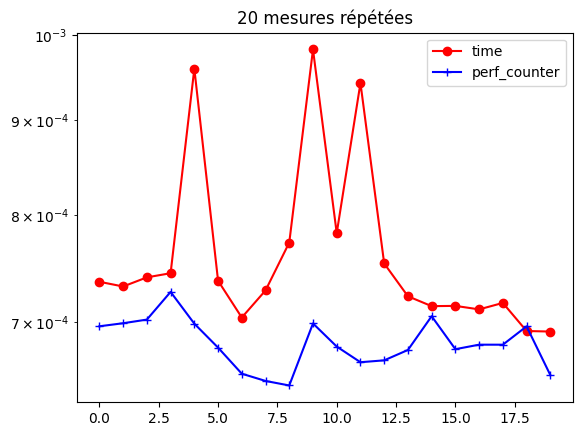

In [20]:
### trace

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_yscale("log", base=10)
ax.plot(t_time, 'ro-', label="time")
ax.plot(t_tsc, 'b+-', label="perf_counter")
#
ax.legend(loc='upper right')
ax.set_title('20 mesures répétées')

#fig.show()
#plt.close()

## Première mesure de complexité 

### Des données de taille variable

L'analyse de complexité dépend de la taille des entrées : $n$.  
Allons-y pour des mesures comme _fonction de cette taille_.  

On fait ça avec `time.time()`.  

00000100 7.010e-06 7.010e-08
00001000 6.802e-05 6.802e-08
00010000 6.872e-04 6.872e-08
00100000 6.762e-03 6.762e-08
01000000 6.756e-02 6.756e-08
10000000 6.700e-01 6.700e-08


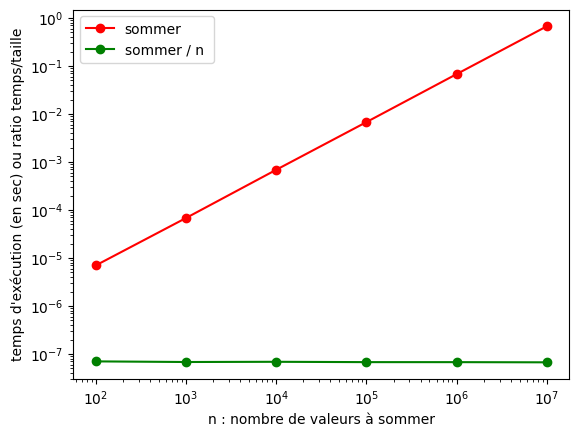

In [21]:
# timings operations en O(n) 

# 1. créer des données
dim = [10**i for i in range(2,8)]
dimmax = dim[len(dim)-1]
a = [random() for i in range(dimmax)]

### plus tard :  avec des ndarray et boucle sommer
# creation de ndarray numpy a partir de liste python (conversion)
#aa = np.array(a)

timings_array = []  # les mesures
ratio_array = []    # les ratios

# 2. mesurer
nbrepet = 10
for n in dim: # on parcours les différentes tailles
    t0 = time.time()
    for repet in range(nbrepet): # répéter les exécutions
            sommer(a, n)
    t = time.time()
    
    # timing moyen pour chaque dimension
    tmoy = (t-t0)/nbrepet
    timings_array.append(tmoy)
    ratio_array.append(tmoy/n)

# 3. aff de controle
for n in range(len(dim)):
    print(fint.format(dim[n]), fexp.format(timings_array[n]), fexp.format(ratio_array[n]))

# 4. tracer
fig, ax = plt.subplots()

ax.plot(dim, timings_array, 'ro-', label="sommer")
ax.plot(dim, ratio_array, 'go-', label="sommer / n ")

ax.set_xscale("log", base=10)
ax.set_yscale("log", base=10)

ax.set_xlabel("n : nombre de valeurs à sommer")
ax.set_ylabel("temps d'exécution (en sec) ou ratio temps/taille")
ax.legend(loc='upper left')


**Conclusion**  
- on observe bien un comportement linéaire, ie. en $\theta(n)$.
